In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *



processGens=ProcessGens()


process_gen_modes=["gemma_wmt"]
# process_gen_modes=["gsm_gemma_test"]
do_norm_analysis=True
processGens.init_with_mode(process_gen_modes)
root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()

examples_df, completions_df=get_dfs(processGens)


dfs_by_model={}

for model_name in examples_df['model'].unique():
    filtered_df = examples_df[examples_df["model"]==model_name]
    filtered_df["rank"]=100-filtered_df["example_idx"]
    dfs_by_model[model_name]=filtered_df

all_dfs_by_model=dfs_by_model


/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


Init: process_gens_mode ['gemma_wmt']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
calculate_gen_summary_dict
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/google_gemma_3_4b_pt/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/google_gemma_3_4b_it/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/google_gemma_3_1b_pt/1_beams/runs/sample_100_eval_500_first_inst_0
snellius_copies/helm_output/sample_100_eval_500_first_inst_0/wmt_14_language_pair_de_en_/google_gemma_3_1b_it/1_beams/runs/sample_100_eval_500_first_inst_0
get_metrics_dict
Index(['example_comet', 'beam_num', 'task_name', 'model', 'example_idx',
       'rank', 'suite', 'instanceID', 'text', 'completion_length',
       'output_logprob', 'isCompletion'],
      dtype='object')
Num examples: 200000
Num completi

/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_79163/1948485024.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_79163/1948485024.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["rank"]=100-filtered_df["example_idx"]
/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_79163/1948485024.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [2]:
print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
    f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")
# instanceGeneration=get_first(processGens.first_run_instances)
print(examples_df.head(2))
print("num examples" ,len(examples_df))
print("num_completions", len(completions_df))
print(f"compare_metric mean: ",examples_df[[compare_metric]].mean())
#current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

max_example_idx = examples_df["example_idx"].max()
plots_wide=1
num_models=len(dfs_by_model.keys())
plots_tall=math.ceil(num_models/plots_wide)

df=next(iter(dfs_by_model.values()))

	 root_folder: snellius_copies/helm_output 
 	 num_beams_list [1] 
 	 models: ['google/gemma-3-4b-pt', 'google/gemma-3-4b-it', 'google/gemma-3-1b-pt', 'google/gemma-3-1b-it'] 
 	 custom_metrics[]
 	 task_names ['wmt_14_language_pair_de_en_'] 
 	 suite_name sample_100_eval_500_first_inst_0 
 	 instance_metrics ['comet']
   example_comet  beam_num                    task_name                 model  \
0       0.267811         1  wmt_14_language_pair_de_en_  google/gemma-3-4b-pt   
1       0.267811         1  wmt_14_language_pair_de_en_  google/gemma-3-4b-pt   

   example_idx  rank                             suite  instanceID text  \
0            0   100  sample_100_eval_500_first_inst_0           0        
1            1    99  sample_100_eval_500_first_inst_0           0        

   completion_length  output_logprob isCompletion  
0                  0       -1.098473         True  
1                  0       -1.098473         None  
num examples 200000
num_completions 2000
compare_metr

google/gemma-3-4b-pt
google/gemma-3-4b-it
google/gemma-3-1b-pt
google/gemma-3-1b-it


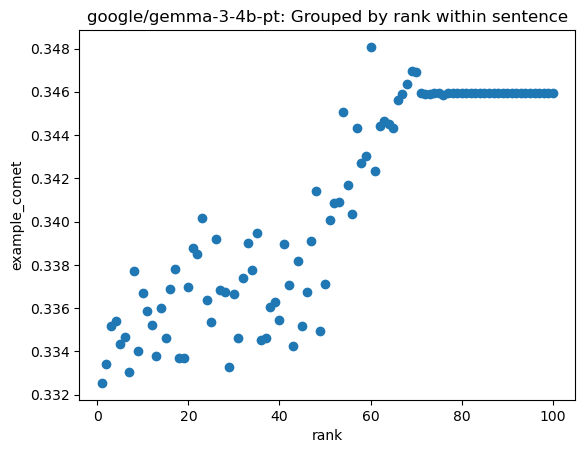

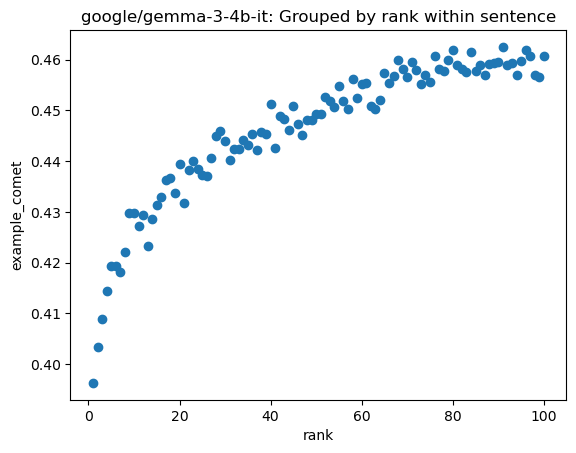

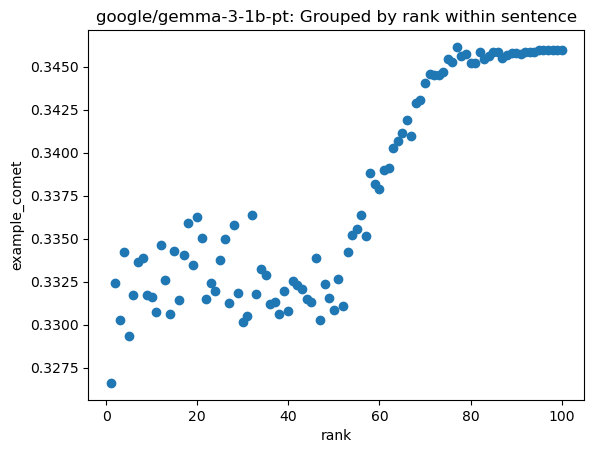

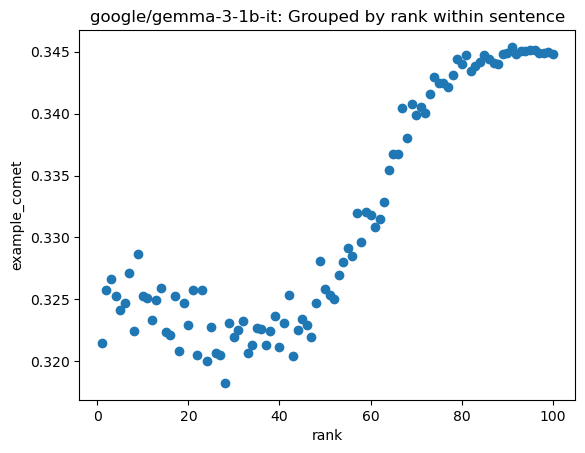

In [3]:

max_example_idx = examples_df["example_idx"].max()
plots_wide=1
num_models=len(dfs_by_model.keys())
plots_tall=math.ceil(num_models/plots_wide)

suptitle=""
axs=None
fig=None


for idx, (model_name, filtered_df) in enumerate(dfs_by_model.items()):
    
    if axs is None:
        ax=None
    else:
        title=model_name
        if(num_models>1):
            axs_x=idx % plots_wide
            axs_y= math.floor(idx / plots_wide)
            ax=axs[axs_x, axs_y]
        else:
            ax=axs
    

    print(model_name)
    def calculate_title():
        return f"{model_name}: {suptitle}" if ax is None else model_name
    # plot by rank within sentence
    suptitle="Grouped by rank within sentence"
    # plot_smooth_spline(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax) 
    plot_grouped(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, error_bar=False)  

if fig is not None:
    fig.suptitle(title)
    fig.tight_layout()
    